pandas → Para manejo de datos.

train_test_split → Para dividir los datos en entrenamiento y prueba.

matplotlib.pyplot → Para gráficos.

LinearRegression → Modelo de regresión lineal de Scikit-learn.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Se carga el archivo CSV que contiene datos de años de experiencia y salarios.

In [5]:
df = pd.read_csv('../data/dataset_salaries_experience.csv')

df.head()         # Muestra las primeras 5 filas

df.shape          # Muestra el tamaño del DataFrame (filas, columnas)

df.describe()     # Muestra estadísticas descriptivas (media, min, max, etc.)

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.shape

(30, 2)

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


X = df.iloc[:, :-1]  # Todas las columnas menos la última (YearsExperience)

y = df.iloc[:, -1]   # La última columna (Salary)

In [9]:
X = df.iloc[:, :-1]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [10]:
y = df.iloc[:, -1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


80% de los datos se usan para entrenar (train).

20% para evaluar (test).

random_state=42 asegura que los resultados sean reproducibles.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

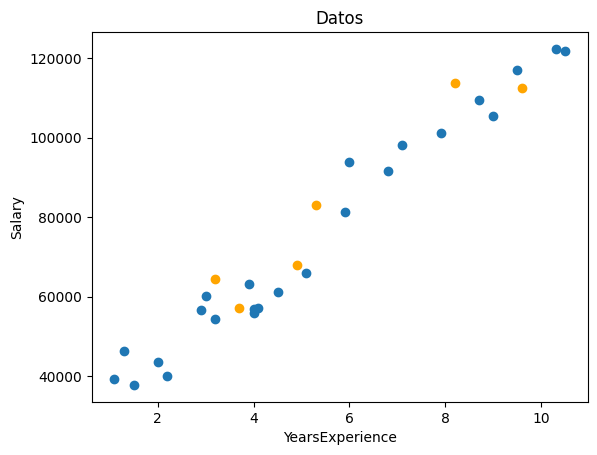

In [12]:
plt.scatter(X_test, y_test, c='orange')
plt.scatter(X_train, y_train)
plt.title('Datos')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Se crea y entrena un modelo de regresión lineal con los datos de entrenamiento.

In [13]:
model = LinearRegression()
model.fit(X_train, y_train) # conjunto de entrenamiento

LinearRegression()

Se usan los datos de prueba (X_test) para que el modelo prediga los salarios (y_pred).

In [14]:
y_pred = model.predict(X_test) # conjunto de validación, predice sobre datos que no conoce

Los puntos naranjas son los valores reales del conjunto de prueba.

La línea roja es la línea de regresión predicha por el modelo.

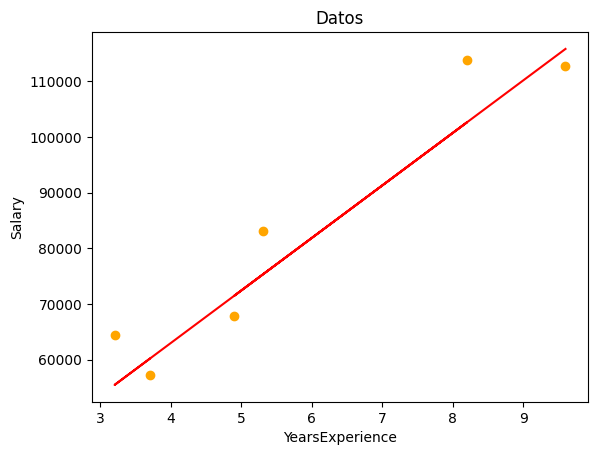

In [15]:
plt.scatter(X_test, y_test, c='orange')
# plt.scatter(X_train, y_train)

plt.plot(X_test, y_pred, c='r') # predicciones

plt.title('Datos')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

El modelo predice el salario esperado para alguien con 9.2 años de experiencia.



In [16]:
model.predict([[9.2]])

g:\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([112020.68398366])

r2_score mide qué tan bien el modelo explica la variabilidad (1.0 es perfecto).

mae es el error absoluto medio, indica cuánto se equivoca en promedio el modelo.

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('r2: ', r2)
print('mae: ', mae)


r2:  0.9024461774180497
mae:  6286.453830757749
